# FAKE NEWS DETECTION

In [1]:
import pandas as pd
from sklearn.utils import shuffle

## IMPORTING DATASETS

In [2]:
fake_data = pd.read_csv("data/Fake.csv")
real_data = pd.read_csv("data/True.csv")
fake_data.head()
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
fake_data["label"] = 0
real_data["label"] = 1

In [4]:
real_data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [5]:
data = pd.concat([fake_data, real_data],axis = 0)
data = shuffle(data)
data.reset_index(drop = True, inplace = True)
data = data[["text", "label"]]

In [6]:
data.head()
data["label"].value_counts()

label
0    23481
1    21417
Name: count, dtype: int64

## DATA PREPROCESSING STAGE

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [8]:
nltk.download("stopwords")
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]','',text)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aftab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
data["text"] = data["text"].apply(clean_text)
X = data["text"]
y = data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [10]:
tfidf = TfidfVectorizer(max_features=30000, ngram_range=(1,2), min_df = 2, max_df = 0.8)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print(X_train_tfidf.shape)

(35918, 30000)


## MODEL TRAINING, TESTING AND EVALUATION

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter =2000, class_weight = "balanced")
model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


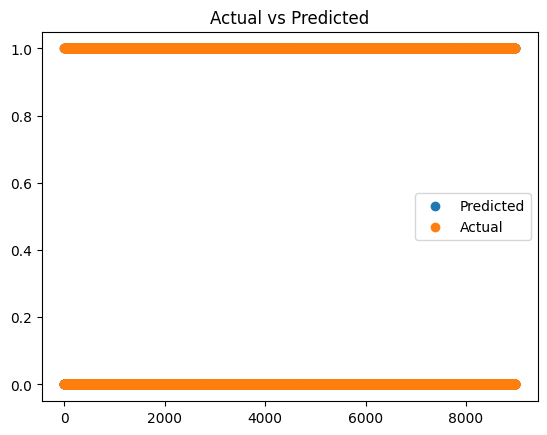

In [12]:
y_pred = model.predict(X_test_tfidf)
import matplotlib.pyplot as plt
plt.scatter(range(len(y_test)), y_test, label = "Predicted")
plt.scatter(range(len(y_pred)), y_pred, label = "Actual")
plt.legend()
plt.title("Actual vs Predicted")
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
print("Accuracy score:",accuracy_score(y_test, y_pred))

Accuracy score: 0.9914253897550112


In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4618   52]
 [  25 4285]]


## CONCLUSION
In this project, we successfully built a Fake News Detection system using Machine Learning. The news text was cleaned and converted into numerical form using TF-IDF Vectorizer. A Logistic Regression model was trained on this data to classify news as fake or real. The model achieved high accuracy, showing that text-based features are very effective for fake news detection. This system can help in identifying misleading information and can be further improved by using larger datasets or advanced models.